In [1]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
from pyspark import SparkContext, SQLContext, SparkConf, StorageLevel
import numpy
from __future__ import division
from decimal import Decimal
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [3]:

SparkContext.getOrCreate().stop()

sparkconf = SparkConf().setAppName("001").setMaster("local[3]")
sc = SparkContext(conf=sparkconf)

In [4]:
# read csv file with 4 partitions and then repartition to 6
survey_df = sc.textFile("/home/mutwiri/hadoop/spark/survey.csv", 4 ).repartition(6)

In [5]:
fields = ( "year",  "industry_name", "variable", "value" )
from collections import namedtuple
Survey = namedtuple('Survey', fields )

def looprecs(line):
    fields = line.split(",")
    return Survey(int(fields[0]), fields[1], fields[2], int(fields[3]) )

named_survey = survey_df.map(lambda rec: looprecs(rec)  )
    

In [6]:
named_survey.take(10)

[Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Rolling mean employees', value=13848),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Salaries and wages paid', value=467),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Sales government funding grants and subsidies', value=3060),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Total income', value=3114),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Total expenditure', value=2895),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Activity unit', value=46134),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Rolling mean employees', value=0),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Salaries and wages paid', value=279),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing

In [7]:
most_surveys = named_survey.filter(lambda rec: rec.value > 5000)

In [8]:
most_surveys.take(10)

[Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Rolling mean employees', value=13848),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Activity unit', value=46134),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Sales government funding grants and subsidies', value=8187),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Total income', value=8866),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Total expenditure', value=7618),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Total assets', value=55700),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Fixed tangible assets', value=32155),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='Activity unit', value=21777),
 Survey(year=2011, industry_name='Agriculture Forestry and Fishing', variable='R

In [9]:
surveys = most_surveys.map(lambda rec: (rec.variable , rec.value))
surveys.collect()
    

[('Rolling mean employees', 13848),
 ('Activity unit', 46134),
 ('Sales government funding grants and subsidies', 8187),
 ('Total income', 8866),
 ('Total expenditure', 7618),
 ('Total assets', 55700),
 ('Fixed tangible assets', 32155),
 ('Activity unit', 21777),
 ('Rolling mean employees', 38136),
 ('Sales government funding grants and subsidies', 13359),
 ('Total income', 13771),
 ('Total expenditure', 12316),
 ('Total assets', 52666),
 ('Fixed tangible assets', 31235)]

In [10]:

surveys_red = surveys.reduceByKey(lambda a,b: a+b)

surveys_red.take(10)

[('Rolling mean employees', 51984),
 ('Total expenditure', 19934),
 ('Sales government funding grants and subsidies', 21546),
 ('Total income', 22637),
 ('Fixed tangible assets', 63390),
 ('Activity unit', 67911),
 ('Total assets', 108366)]

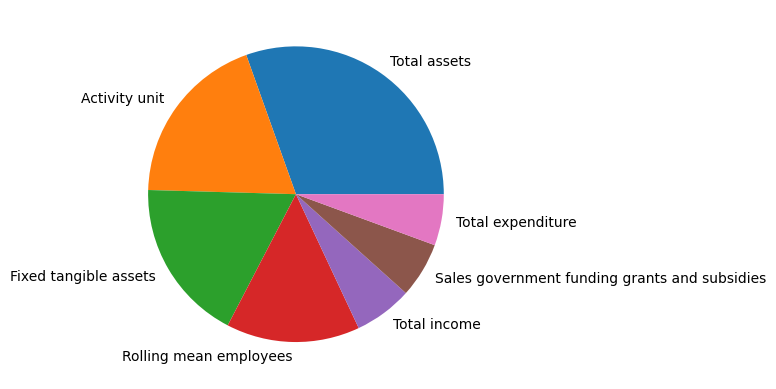

In [11]:
                                 
surveys_result = surveys_red.sortBy(lambda rec: rec[-1], ascending=False).collect()
list = []
list2= []

for (a,b) in surveys_result:
    list.append(a)
    list2.append(b)

plt.pie(list2, labels = list)

# plt.axis('equal')
plt.show()

In [12]:
sc.stop()